In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
import numpy as np
data = pd.read_csv('preprocess.csv',
                  encoding ='ISO-8859-1')
print(data)

      Unnamed: 0           created_at  favorite_count              id_str  \
0              0  2016-12-30 22:18:18           84254  814958820980039680   
1              1  2016-12-30 19:46:55           25336  814920722208296960   
2              2  2016-12-30 19:41:33           97669  814919370711461888   
3              3  2016-12-29 14:54:21           45609  814484710025994240   
4              4  2016-12-28 22:06:28           51857  814231064847728640   
5              5  2016-12-28 14:25:11          117710  814114980983427072   
6              6  2016-12-28 14:19:46          106626  814113616110751744   
7              7  2016-12-28 14:07:13          117900  814110460761018368   
8              8  2016-12-28 03:10:07           78521  813945096269860864   
9              9  2016-12-27 21:52:29           99838  813865160163098624   
10            10  2016-12-27 03:06:59           67470  813581917215977472   
11            11  2016-12-27 02:53:20           71643  813578484572450816   

In [2]:
data_scrub = data.dropna()
print(data_scrub)

      Unnamed: 0           created_at  favorite_count              id_str  \
0              0  2016-12-30 22:18:18           84254  814958820980039680   
1              1  2016-12-30 19:46:55           25336  814920722208296960   
2              2  2016-12-30 19:41:33           97669  814919370711461888   
3              3  2016-12-29 14:54:21           45609  814484710025994240   
4              4  2016-12-28 22:06:28           51857  814231064847728640   
5              5  2016-12-28 14:25:11          117710  814114980983427072   
6              6  2016-12-28 14:19:46          106626  814113616110751744   
7              7  2016-12-28 14:07:13          117900  814110460761018368   
8              8  2016-12-28 03:10:07           78521  813945096269860864   
9              9  2016-12-27 21:52:29           99838  813865160163098624   
10            10  2016-12-27 03:06:59           67470  813581917215977472   
11            11  2016-12-27 02:53:20           71643  813578484572450816   

In [3]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data_scrub["text_pp"])

true_k = 12
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X)

print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(true_k):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print

print("\n")
print("Prediction")

Y = vectorizer.transform(["Thank you all for coming to this rally in new hampshire, great turnout, big in polls"])
prediction = model.predict(Y)
print(prediction)

Y = vectorizer.transform(["Crooked Hillary is a weak leader! Bad!"])
prediction = model.predict(Y)
print(prediction)
labels = model.labels_

Y = vectorizer.transform(["first im carolina"])
prediction = model.predict(Y)
print(prediction)
#Then get the frequency count of the non-negative labels
counts = np.bincount(labels[labels>=0])

print(counts)

Top terms per cluster:
Cluster 0:
 great
 thank
 rt
 job
 debate
 get
 time
 new
 president
 today
Cluster 1:
 trump
 vote
 2016
 donald
 thank
 primary
 train
 great
 caucus
 get
Cluster 2:
 thank
 2016
 trump
 america
 first
 im
 maga
 super
 soon
 new
Cluster 3:
 join
 tomorrow
 ticket
 ohio
 2016
 trump
 live
 maga
 america
 florida
Cluster 4:
 swamp
 drain
 time
 clinton
 truth
 league
 debate
 big
 hillary
 crooked
Cluster 5:
 america
 make
 great
 trump
 2016
 thank
 vote
 let
 safe
 new
Cluster 6:
 enjoy
 interviewed
 tonight
 pm
 morning
 week
 wife
 eastern
 tomorrow
 melania
Cluster 7:
 cruz
 ted
 league
 big
 truth
 debate
 lyin
 rubio
 canada
 rt
Cluster 8:
 poll
 new
 thank
 great
 trump
 number
 debate
 america
 national
 first
Cluster 9:
 hillary
 crooked
 clinton
 bad
 bernie
 judgement
 want
 president
 said
 isi
Cluster 10:
 carolina
 south
 north
 thank
 great
 vote
 big
 america
 make
 trump
Cluster 11:
 people
 great
 american
 many
 want
 president
 trump
 countr

In [4]:
data_scrub['label_kmeans'] = model.labels_

C:\Users\feder\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [5]:
import random

groups=[data_scrub.loc[data_scrub['label_kmeans'] == i] for i in range(true_k)]
for i in range(true_k):
    test=(groups[i].sample(3)["text"])
    print("sampling cluster",i)
    for tweet in test:
        print(tweet)
        print("\n")

sampling cluster 0
Obama has blocked ICE officers and BP from doing their jobs. That ends when I am President!


Hopefully others will follow suit. Our country needs &amp; should demand security. It is time to get tough &amp; be smart!


Praying for everyone in Florida. Hoping the hurricane dissipates, but in any event, please be careful.


sampling cluster 1
"@RedRising11: ðºð¸I am a woman &amp; I JUST VOTED FOR @realDonaldTrump #NebraskaPrimary #Trump2016 #TrumpForPresident https://t.co/zgzwxQ92wZ"


"@creta_r: @realDonaldTrump Looking forward to watching Donald Trump rally Thursday night on CNN!!"


"@free_SA_BD: @realDonaldTrump A vote for Trump is a vote to restore our great country."


sampling cluster 2
Thank you America! #Trump2016 https://t.co/PTKkrLeuCB


Thank you! #AmericaFirst https://t.co/6v4C8ykDVl


Thank you Ohio! #AmericaFirst https://t.co/p68GAJdhwu


sampling cluster 3
Join me! 
6/10: Richmond, VA - 8pm
6/11: Tampa, FL - 11am
6/11: Pittsburgh, PA - 3pm
6/13: Por

In [7]:
import matplotlib.pyplot as plt

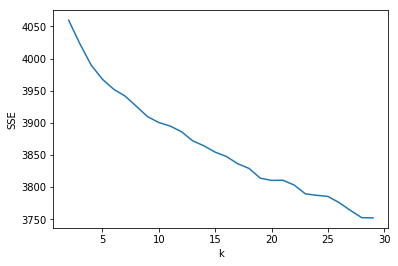

Wall time: 8min 28s


In [8]:
%%time
sse_list = list()
max_k = 30
#plt.figure((12,6))
for k in range(2,max_k):
    kmeans = KMeans(init='k-means++', n_clusters=k, n_init=10, max_iter=100)
    kmeans.fit(X)
    sse = kmeans.inertia_
    sse_list.append(sse)
plt.xlabel('k')
plt.ylabel('SSE')
plt.plot(range(2,max_k), sse_list)
plt.show()

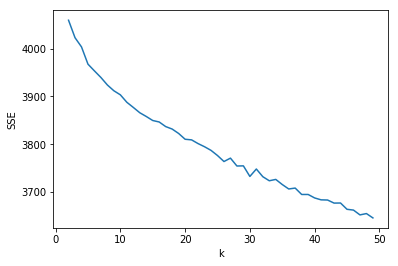

Wall time: 15min 57s


In [9]:
%%time
sse_list = list()
max_k = 50
#plt.figure((12,6))
for k in range(2,max_k):
    kmeans = KMeans(init='k-means++', n_clusters=k, n_init=10, max_iter=100)
    kmeans.fit(X)
    sse = kmeans.inertia_
    sse_list.append(sse)
plt.xlabel('k')
plt.ylabel('SSE')
plt.plot(range(2,max_k), sse_list)
plt.show()

In [12]:
from sklearn.metrics import silhouette_score


In [41]:
kmeans = KMeans(n_clusters = 20)
kmeans.fit(X)
hist, bins = np.histogram(kmeans.labels_, bins=range(0, len(set(kmeans.labels_)) + 1))
print ('centers', kmeans.cluster_centers_)
print ('labels', dict(zip(bins, hist)))
print ('sse', kmeans.inertia_)
print ('silhouette', silhouette_score(X, kmeans.labels_))

centers [[0.00462833 0.03376759 0.         ... 0.00635617 0.         0.00630295]
 [0.00054898 0.00479909 0.         ... 0.00036651 0.         0.0014266 ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.00799214 0.00296312 0.         ... 0.         0.         0.00123571]
 [0.         0.0062198  0.         ... 0.         0.00266044 0.        ]
 [0.         0.01841135 0.         ... 0.         0.         0.        ]]
labels {0: 83, 1: 1607, 2: 81, 3: 71, 4: 191, 5: 79, 6: 125, 7: 82, 8: 158, 9: 149, 10: 67, 11: 239, 12: 124, 13: 183, 14: 118, 15: 141, 16: 262, 17: 203, 18: 177, 19: 78}
sse 3815.9349206497905
silhouette 0.012942752867801086


In [15]:
kmeans = KMeans(n_clusters = 12)
kmeans.fit(X)
hist, bins = np.histogram(kmeans.labels_, bins=range(0, len(set(kmeans.labels_)) + 1))
print ('centers', kmeans.cluster_centers_)
print ('labels', dict(zip(bins, hist)))
print ('sse', kmeans.inertia_)
print ('silhouette', silhouette_score(X, kmeans.labels_))

centers [[0.00117921 0.00217604 0.00025279 ... 0.00204854 0.         0.00304874]
 [0.0031748  0.04519792 0.         ... 0.00436002 0.         0.00432351]
 [0.00129865 0.02615967 0.         ... 0.00215478 0.         0.        ]
 ...
 [0.         0.01523021 0.         ... 0.         0.         0.        ]
 [0.         0.0084264  0.         ... 0.         0.         0.        ]
 [0.03702777 0.205522   0.         ... 0.00483978 0.         0.00479925]]
labels {0: 2139, 1: 121, 2: 194, 3: 192, 4: 349, 5: 231, 6: 410, 7: 157, 8: 91, 9: 38, 10: 75, 11: 221}
sse 3881.6870227058457
silhouette 0.01688385680455856


In [42]:
data_scrub.head()

,Unnamed: 0,created_at,favorite_count,id_str,is_retweet,retweet_count,source,text,text_pp,label_kmeans
0,0,2016-12-30 22:18:18,84254,814958820980039680,False,23213,Twitter for Android,Russians are playing @CNN and @NBCNews for suc...,russian playing fool funny watch clue totally get,0
1,1,2016-12-30 19:46:55,25336,814920722208296960,False,7366,Twitter for iPhone,"Join @AmerIcan32, founded by Hall of Fame lege...",join founded hall fame legend washington dc â,0
2,2,2016-12-30 19:41:33,97669,814919370711461888,False,34415,Twitter for Android,Great move on delay (by V. Putin) - I always k...,great move delay v putin always knew smart,0
3,3,2016-12-29 14:54:21,45609,814484710025994240,False,11330,Twitter for iPhone,My Administration will follow two simple rules...,administration follow two simple rule,0
4,4,2016-12-28 22:06:28,51857,814231064847728640,False,13919,Twitter for iPhone,'Economists say Trump delivered hope' https://...,economist say trump delivered hope,1


In [43]:
data_scrub_temp = pd.read_csv('preprocess.csv', 
                              encoding ='ISO-8859-1')
data_scrub_temp = data_scrub_temp.dropna()
data_scrub_temp['label_kmeans'] = kmeans.labels_
data_scrub_temp.head()

,Unnamed: 0,created_at,favorite_count,id_str,is_retweet,retweet_count,source,text,text_pp,label_kmeans
0,0,2016-12-30 22:18:18,84254,814958820980039680,False,23213,Twitter for Android,Russians are playing @CNN and @NBCNews for suc...,russian playing fool funny watch clue totally get,1
1,1,2016-12-30 19:46:55,25336,814920722208296960,False,7366,Twitter for iPhone,"Join @AmerIcan32, founded by Hall of Fame lege...",join founded hall fame legend washington dc â,9
2,2,2016-12-30 19:41:33,97669,814919370711461888,False,34415,Twitter for Android,Great move on delay (by V. Putin) - I always k...,great move delay v putin always knew smart,1
3,3,2016-12-29 14:54:21,45609,814484710025994240,False,11330,Twitter for iPhone,My Administration will follow two simple rules...,administration follow two simple rule,1
4,4,2016-12-28 22:06:28,51857,814231064847728640,False,13919,Twitter for iPhone,'Economists say Trump delivered hope' https://...,economist say trump delivered hope,1


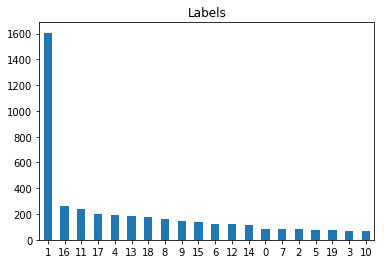

In [44]:
data_scrub_temp['label_kmeans'].value_counts().plot(kind='bar', title='Labels')
plt.xticks(rotation=0)
plt.show()

In [45]:
len(kmeans.cluster_centers_)

20

In [46]:
data_scrub_temp[data_scrub_temp['label_kmeans']==0].describe()

,Unnamed: 0,favorite_count,id_str,retweet_count,label_kmeans
count,83.00000,83.000000,8.300000e+01,83.000000,83.0
mean,2822.60241,13136.132530,7.205710e+17,4603.036145,0.0
std,1298.13086,13397.111569,3.802964e+16,4363.221207,0.0
min,160.00000,0.000000,6.827645e+17,792.000000,0.0
25%,1973.50000,5707.000000,6.951318e+17,1971.000000,0.0
50%,3606.00000,8328.000000,6.970777e+17,2750.000000,0.0
75%,3692.00000,16956.000000,7.443933e+17,6084.500000,0.0
max,4220.00000,101706.000000,8.030336e+17,31124.000000,0.0


In [47]:
data_scrub_temp[data_scrub_temp['label_kmeans']==4].describe()

,Unnamed: 0,favorite_count,id_str,retweet_count,label_kmeans
count,191.000000,191.000000,1.910000e+02,191.000000,191.0
mean,2558.926702,13619.958115,7.266724e+17,4717.774869,4.0
std,991.824584,8174.818788,2.982433e+16,3045.658846,0.0
min,95.000000,0.000000,6.834181e+17,596.000000,4.0
25%,2044.500000,7753.500000,7.048265e+17,2722.000000,4.0
50%,2611.000000,12327.000000,7.228028e+17,4100.000000,4.0
75%,3222.500000,17410.500000,7.414342e+17,5832.000000,4.0
max,4197.000000,59671.000000,8.070577e+17,22047.000000,4.0


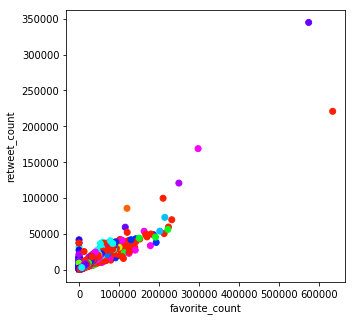

In [52]:
plt.figure(figsize=(5, 5)) 
plt.scatter(x=data_scrub_temp['favorite_count'], y=data_scrub_temp['retweet_count'], 
            c=data_scrub_temp['label_kmeans'], cmap='gist_rainbow')
plt.xlabel('favorite_count')
plt.ylabel('retweet_count')
#plt.legend()
plt.show()

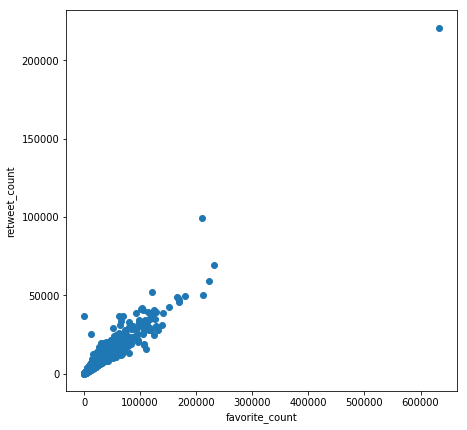

In [60]:
ds_c = data_scrub_temp[data_scrub_temp['label_kmeans']==1]
plt.figure(figsize=(7, 7))
plt.scatter(x=ds_c['favorite_count'], y=ds_c['retweet_count'])
plt.xlabel('favorite_count')
plt.ylabel('retweet_count')
#plt.legend()
plt.show()

In [61]:
kmeans.cluster_centers_[0]

array([0.00462833, 0.03376759, 0.        , ..., 0.00635617, 0.        ,
       0.00630295])

In [ ]:
#plot without cluster 0





### DBSCAN

In [63]:
from sklearn.cluster import DBSCAN

In [80]:
dbscan = DBSCAN(eps=0.2, min_samples=10, metric='euclidean')
dbscan.fit(X)

hist, bins = np.histogram(dbscan.labels_, bins=range(-1, len(set(dbscan.labels_)) + 1))
print ('labels', dict(zip(bins, hist)))
print ('silhouette', silhouette_score(X, dbscan.labels_))

labels {-1: 4151, 0: 11, 1: 27, 2: 12, 3: 17, 4: 0}
silhouette -0.03084450290929195


In [66]:
data_scrub_temp = pd.read_csv('preprocess.csv', 
                              encoding ='ISO-8859-1')
data_scrub_temp = data_scrub_temp.dropna()
data_scrub_temp['label_dbscan'] = dbscan.labels_
data_scrub_temp.head()

,Unnamed: 0,created_at,favorite_count,id_str,is_retweet,retweet_count,source,text,text_pp,label_dbscan
0,0,2016-12-30 22:18:18,84254,814958820980039680,False,23213,Twitter for Android,Russians are playing @CNN and @NBCNews for suc...,russian playing fool funny watch clue totally get,-1
1,1,2016-12-30 19:46:55,25336,814920722208296960,False,7366,Twitter for iPhone,"Join @AmerIcan32, founded by Hall of Fame lege...",join founded hall fame legend washington dc â,-1
2,2,2016-12-30 19:41:33,97669,814919370711461888,False,34415,Twitter for Android,Great move on delay (by V. Putin) - I always k...,great move delay v putin always knew smart,-1
3,3,2016-12-29 14:54:21,45609,814484710025994240,False,11330,Twitter for iPhone,My Administration will follow two simple rules...,administration follow two simple rule,-1
4,4,2016-12-28 22:06:28,51857,814231064847728640,False,13919,Twitter for iPhone,'Economists say Trump delivered hope' https://...,economist say trump delivered hope,-1


In [67]:
data_scrub_temp["label_dbscan"].unique()

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16, 17, 18, 19, 20, 21, 22, 23], dtype=int64)

In [68]:
data_scrub_temp[data_scrub_temp['label_dbscan']==0].describe()

,Unnamed: 0,favorite_count,id_str,retweet_count,label_dbscan
count,4.000000,4.000000,4.000000e+00,4.000000,4.0
mean,1819.500000,13896.000000,7.512738e+17,3118.250000,0.0
std,1534.750034,9995.183573,4.803157e+16,1724.087657,0.0
min,79.000000,4989.000000,6.949610e+17,1517.000000,0.0
25%,962.500000,7944.000000,7.249095e+17,1943.750000,0.0
50%,1748.500000,11355.000000,7.510136e+17,2783.500000,0.0
75%,2605.500000,17307.000000,7.773779e+17,3958.000000,0.0
max,3702.000000,27885.000000,8.081072e+17,5389.000000,0.0


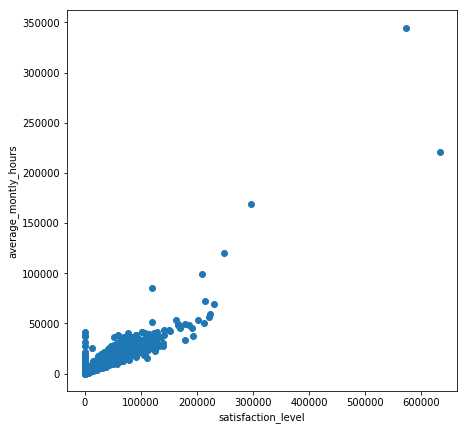

In [71]:
ds_d = data_scrub_temp[data_scrub_temp['label_dbscan']==-1]
plt.figure(figsize=(7, 7))
plt.scatter(x=ds_d['favorite_count'], y=ds_d['retweet_count'])
plt.xlabel('satisfaction_level')
plt.ylabel('average_montly_hours')
#plt.legend()
plt.show()

In [83]:
X.to_csv("x")

AttributeError: to_csv not found